In [2]:
import sqlite3
import pandas as pd
conn = sqlite3.connect('factbook.db')

### Table Structure

In [4]:
res = conn.execute("SELECT * FROM sqlite_master WHERE type='table'").fetchall()
res

[('table',
  'sqlite_sequence',
  'sqlite_sequence',
  3,
  'CREATE TABLE sqlite_sequence(name,seq)'),
 ('table',
  'facts',
  'facts',
  47,
  'CREATE TABLE "facts" ("id" INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, "code" varchar(255) NOT NULL, "name" varchar(255) NOT NULL, "area" integer, "area_land" integer, "area_water" integer, "population" integer, "population_growth" float, "birth_rate" float, "death_rate" float, "migration_rate" float)')]

### Glance at the facts table

In [5]:
pd.read_sql_query("SELECT * FROM facts", conn).head(5)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230.0,652230.0,0.0,32564342.0,2.32,38.57,13.89,1.51
1,2,al,Albania,28748.0,27398.0,1350.0,3029278.0,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741.0,2381741.0,0.0,39542166.0,1.84,23.67,4.31,0.92
3,4,an,Andorra,468.0,468.0,0.0,85580.0,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700.0,1246700.0,0.0,19625353.0,2.78,38.78,11.49,0.46


In [6]:
pd.read_sql_query("SELECT MIN(population), MAX(population), MIN(population_growth), MAX(population_growth) FROM facts", conn)

,MIN(population),MAX(population),MIN(population_growth),MAX(population_growth)
0,0,7256490011,0.0,4.02


Wonderful countries!! Let's see which countries are they.

In [7]:
pd.read_sql_query("SELECT * FROM facts WHERE population=0", conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None


In [8]:
pd.read_sql_query("SELECT * FROM facts WHERE population=7256490011", conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None


It's reasonable in some aspects. Let us it go.

### Population related histogram

In [9]:
# check how to eliminate ouliers
pd.read_sql_query("SELECT * FROM facts WHERE area IS NULL AND migration_rate IS NULL", conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,210,fs,French Southern and Antarctic Lands,None,NaN,None,NaN,NaN,NaN,NaN,None
1,212,tb,Saint Barthelemy,None,NaN,None,7.237000e+03,NaN,NaN,NaN,None
2,249,um,United States Pacific Island Wildlife Refuges,None,NaN,None,NaN,NaN,NaN,NaN,None
3,250,ay,Antarctica,None,280000.0,None,0.000000e+00,NaN,NaN,NaN,None
4,256,xq,Arctic Ocean,None,NaN,None,NaN,NaN,NaN,NaN,None
5,257,zh,Atlantic Ocean,None,NaN,None,NaN,NaN,NaN,NaN,None
6,258,xo,Indian Ocean,None,NaN,None,NaN,NaN,NaN,NaN,None
7,259,zn,Pacific Ocean,None,NaN,None,NaN,NaN,NaN,NaN,None
8,260,oo,Southern Ocean,None,NaN,None,NaN,NaN,NaN,NaN,None
9,261,xx,World,None,NaN,None,7.256490e+09,1.08,18.6,7.8,None


In [10]:
df = pd.read_sql_query("SELECT population, population_growth, birth_rate, death_rate FROM facts  WHERE area IS NOT NULL AND migration_rate IS NOT NULL", conn)
df.head()

,population,population_growth,birth_rate,death_rate
0,32564342,2.32,38.57,13.89
1,3029278,0.30,12.92,6.58
2,39542166,1.84,23.67,4.31
3,85580,0.12,8.13,6.96
4,19625353,2.78,38.78,11.49


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2885: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed25c23320>,
      dtype=object)

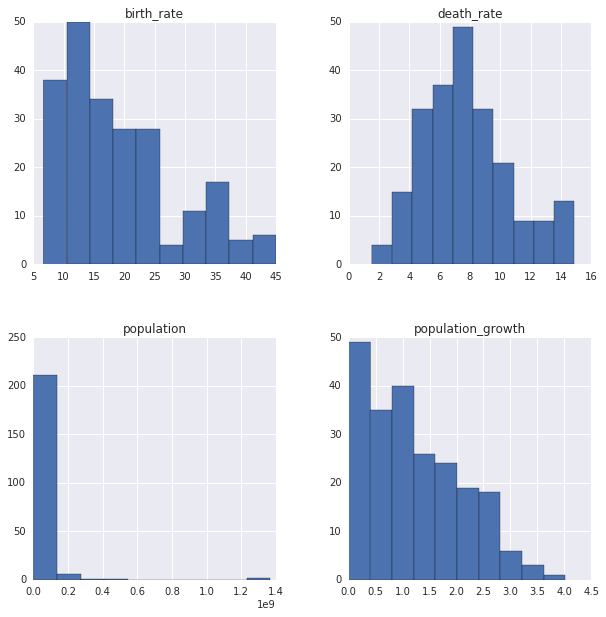

In [21]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(221)
df.hist(ax=ax)


# Wonderful Countries

### Population Giants

In [23]:
pd.read_sql_query("SELECT name, population FROM facts WHERE area IS NOT NULL AND migration_rate IS NOT NULL ORDER BY population DESC LIMIT 10", conn)

,name,population
0,China,1367485388
1,India,1251695584
2,European Union,513949445
3,United States,321368864
4,Indonesia,255993674
5,Brazil,204259812
6,Pakistan,199085847
7,Nigeria,181562056
8,Bangladesh,168957745
9,Russia,142423773


### The most buzzing Countries

In [26]:
query = '''
SELECT name, ROUND(CAST(population AS float)/area_land, 2) AS density, population, area_land 
FROM facts 
WHERE area IS NOT NULL AND migration_rate IS NOT NULL 
ORDER BY density DESC LIMIT 10
'''
pd.read_sql_query(query, conn)

,name,density,population,area_land
0,Macau,21168.96,592731,28
1,Monaco,15267.50,30535,2
2,Singapore,8259.78,5674472,687
3,Hong Kong,6655.27,7141106,1073
4,Gaza Strip,5191.82,1869055,360
5,Gibraltar,4876.33,29258,6
6,Bahrain,1771.86,1346613,760
7,Maldives,1319.64,393253,298
8,Malta,1310.02,413965,316
9,Bermuda,1299.93,70196,54


### The most sparse Countries

In [29]:
query = '''
SELECT name, ROUND(CAST(population AS float)/area_land, 2) AS density, population, area_land 
FROM facts 
WHERE area IS NOT NULL AND migration_rate IS NOT NULL AND area_land IS NOT NULL
ORDER BY density LIMIT 10
'''
pd.read_sql_query(query, conn)

,name,density,population,area_land
0,Greenland,0.03,57733,2166086
1,Mongolia,1.93,2992908,1553556
2,Namibia,2.69,2212307,823290
3,Australia,2.96,22751014,7682300
4,Iceland,3.31,331918,100250
5,Mauritania,3.49,3596702,1030700
6,Libya,3.64,6411776,1759540
7,Suriname,3.72,579633,156000
8,Guyana,3.73,735222,196849
9,Botswana,3.85,2182719,566730
